# Poço Quântico

Neste documento demonstramos a utilização do software e indicamos os resultados, que podem ser visualizados no modo abaixo ou acessados na pasta **results**.

## Inicialização

Para utilizar o módulo, basta importar as bibliotecas abaixo:

In [1]:
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import simps
from quantum_well import QuantumWell
warnings.filterwarnings('error')

e instanciar um dispositivo.

In [2]:
device = QuantumWell(well_length=100.0, well_height=1.0, N=2048, dt=1e-18)

Este é o potencial que vamos usar:

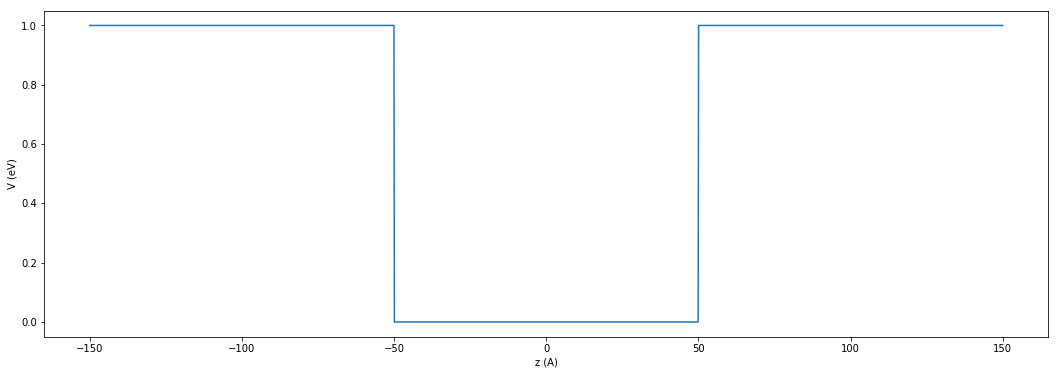

In [42]:
fix, ax = plt.subplots(1,1, figsize=(18,6))
ax.plot(device.z_ang, device.v_ev)
ax.set_xlabel(r'z (A)')
ax.set_ylabel(r'V (eV)')
plt.show()

que foi iniciado com as seguintes propriedades:

- **well_length=100.0**, largura de 100.0 Angstrom
- **well_height=1.0**, altura de 1.0 eV
- **N=2048**, 2048 pontos na malha (discretização)
- **dt=1e-19**, passo de tempo de $1 \times 10^{-18}$ segundos

## Calculo dos Autoestados e Autovalores

O comando abaxo solicita o cálculo dos autoestados e autovalores com precisao de 0.01 %.

Está precisão não é em relação ao valor analítico, mas em relação ao valor para o qual o algoritmo convergiu (que possui um erro em relação ao analítico).

In [3]:
device.evolve_imaginary(precision=1e-4)

Energy [0]:
                                Numeric=3.4898948254e-03
                                Analytic=3.4828952350e-03
                                iterations=104000
                                --------------
Energy [1]:
                                Numeric=1.3951814274e-02
                                Analytic=1.3929748807e-02
                                iterations=76000
                                --------------
Energy [2]:
                                Numeric=3.1373388323e-02
                                Analytic=3.1334961741e-02
                                iterations=48000
                                --------------
Energy [3]:
                                Numeric=5.5750644769e-02
                                Analytic=5.5688922416e-02
                                iterations=41000
                                --------------
Energy [4]:
                                Numeric=8.7064283660e-02
                                Analyt

Como é possível ver acima (clique na tela para rolar) temos 17 autoestados, com autovalores:

In [11]:
device.eigenvalues

array([ 0.00348989,  0.01395181,  0.03137339,  0.05575064,  0.08706428,
        0.12528954,  0.17042459,  0.22240967,  0.28119866,  0.34675937,
        0.41898721,  0.49778468,  0.58299325,  0.67429257,  0.77127282,
        0.87295473,  0.97561505])

Os autovalores analíticos são:

In [13]:
device.analytical_eigenvalues = np.array(device.analytical_solution())
device.analytical_eigenvalues

array([ 0.0034829 ,  0.01392975,  0.03133496,  0.05568892,  0.08697753,
        0.12518145,  0.17027502,  0.22222458,  0.28098598,  0.34650064,
        0.41868927,  0.4974408 ,  0.58259197,  0.67388421,  0.77085693,
        0.87249409,  0.97487074])

Vamos ver o erro em cada autovalor:

In [16]:
eigenvalues = pd.DataFrame({'analytic': device.analytical_eigenvalues, 'numeric': device.eigenvalues})
eigenvalues['error (%)'] = eigenvalues.apply(lambda l: 100.0*(l['numeric']/l['analytic']-1.0), axis=1)
eigenvalues

,analytic,numeric,error (%)
0,0.003483,0.003490,0.200970
1,0.013930,0.013952,0.158405
2,0.031335,0.031373,0.122632
3,0.055689,0.055751,0.110834
4,0.086978,0.087064,0.099745
5,0.125181,0.125290,0.086344
6,0.170275,0.170425,0.087840
7,0.222225,0.222410,0.083290
8,0.280986,0.281199,0.075690
9,0.346501,0.346759,0.074668


Vamos imprimir os autoestados:

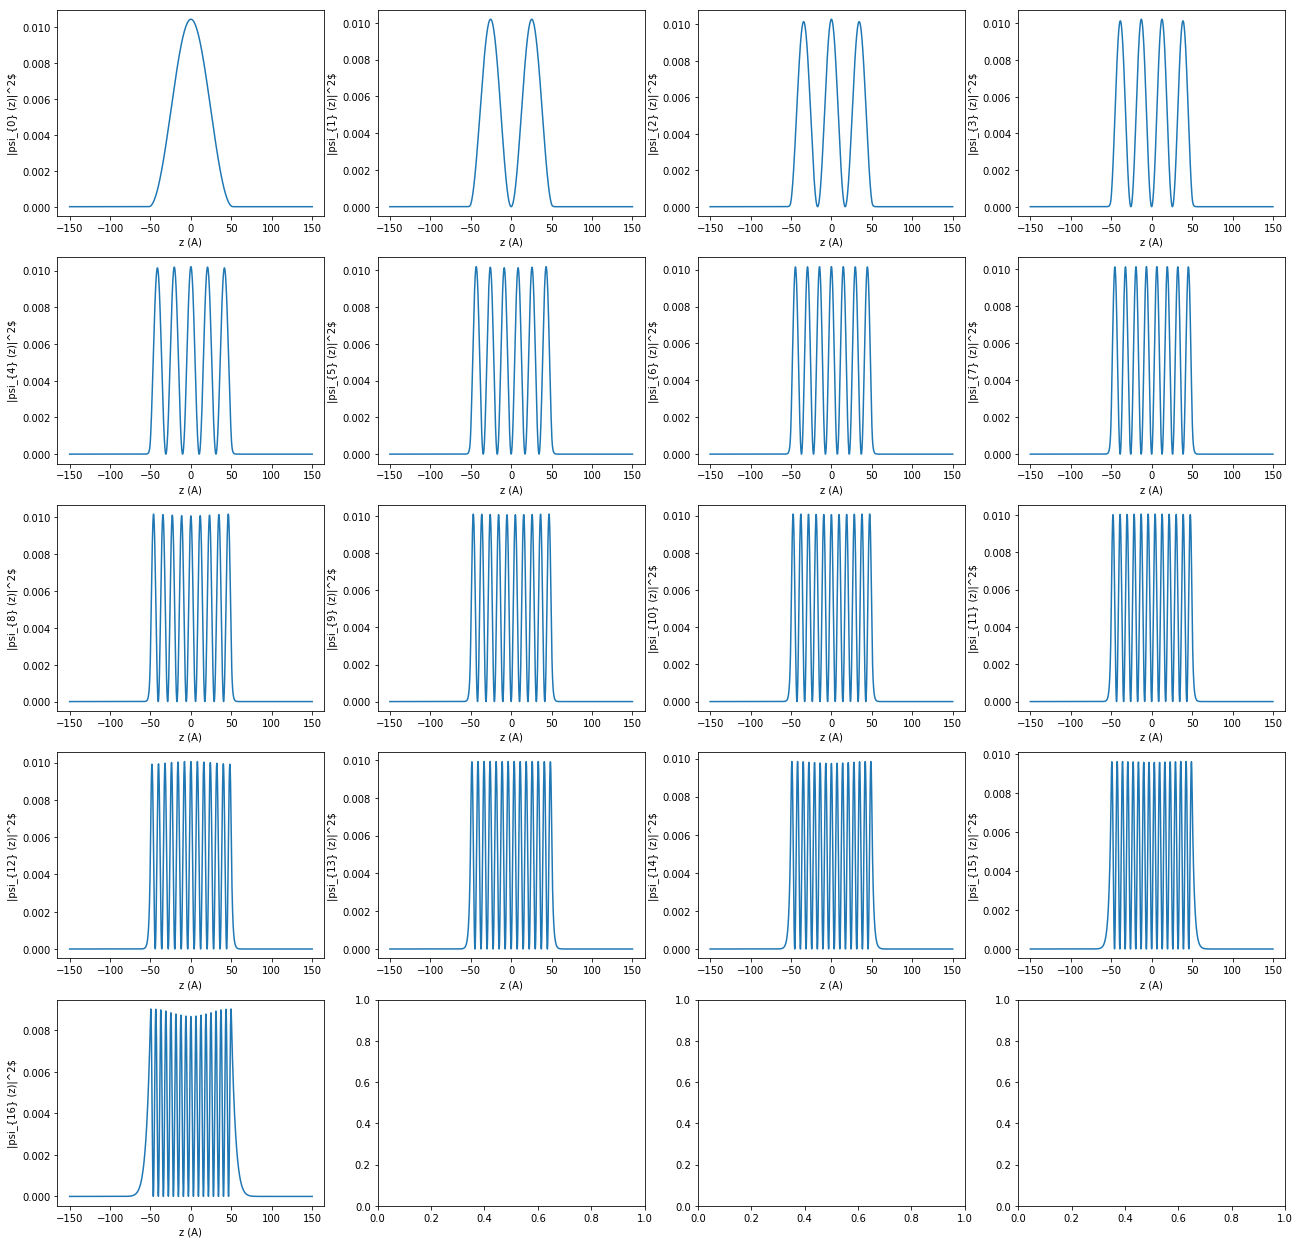

In [28]:
fix, axs = plt.subplots(5,4, figsize=(22,22))
for i in range(5):
    for j in range(4):
        if (4*i+j) >= len(device.eigenstates):
            continue
        axs[i,j].plot(device.z_ang, np.abs(device.eigenstates[4*i+j])**2)
        axs[i,j].set_xlabel(r'z (A)')
        axs[i,j].set_ylabel(r'|psi_{%d} (z)|^2$' % (4*i+j))
plt.show()

Estes autoestados estão normalizados para um eixo **z** em unidades atômicas, vamos normalizar eles para um eixo **z** em Angstrom:

In [30]:
z = device.z_ang
def normalize2ang(psi):
    # psi / (<psi|psi>)^(1/2)
    return psi / np.sqrt(simps(psi.conj()*psi,z))
device.eigenstates_ang = [normalize2ang(es) for es in device.eigenstates]

vamos imprimir para ver que está tudo certo:

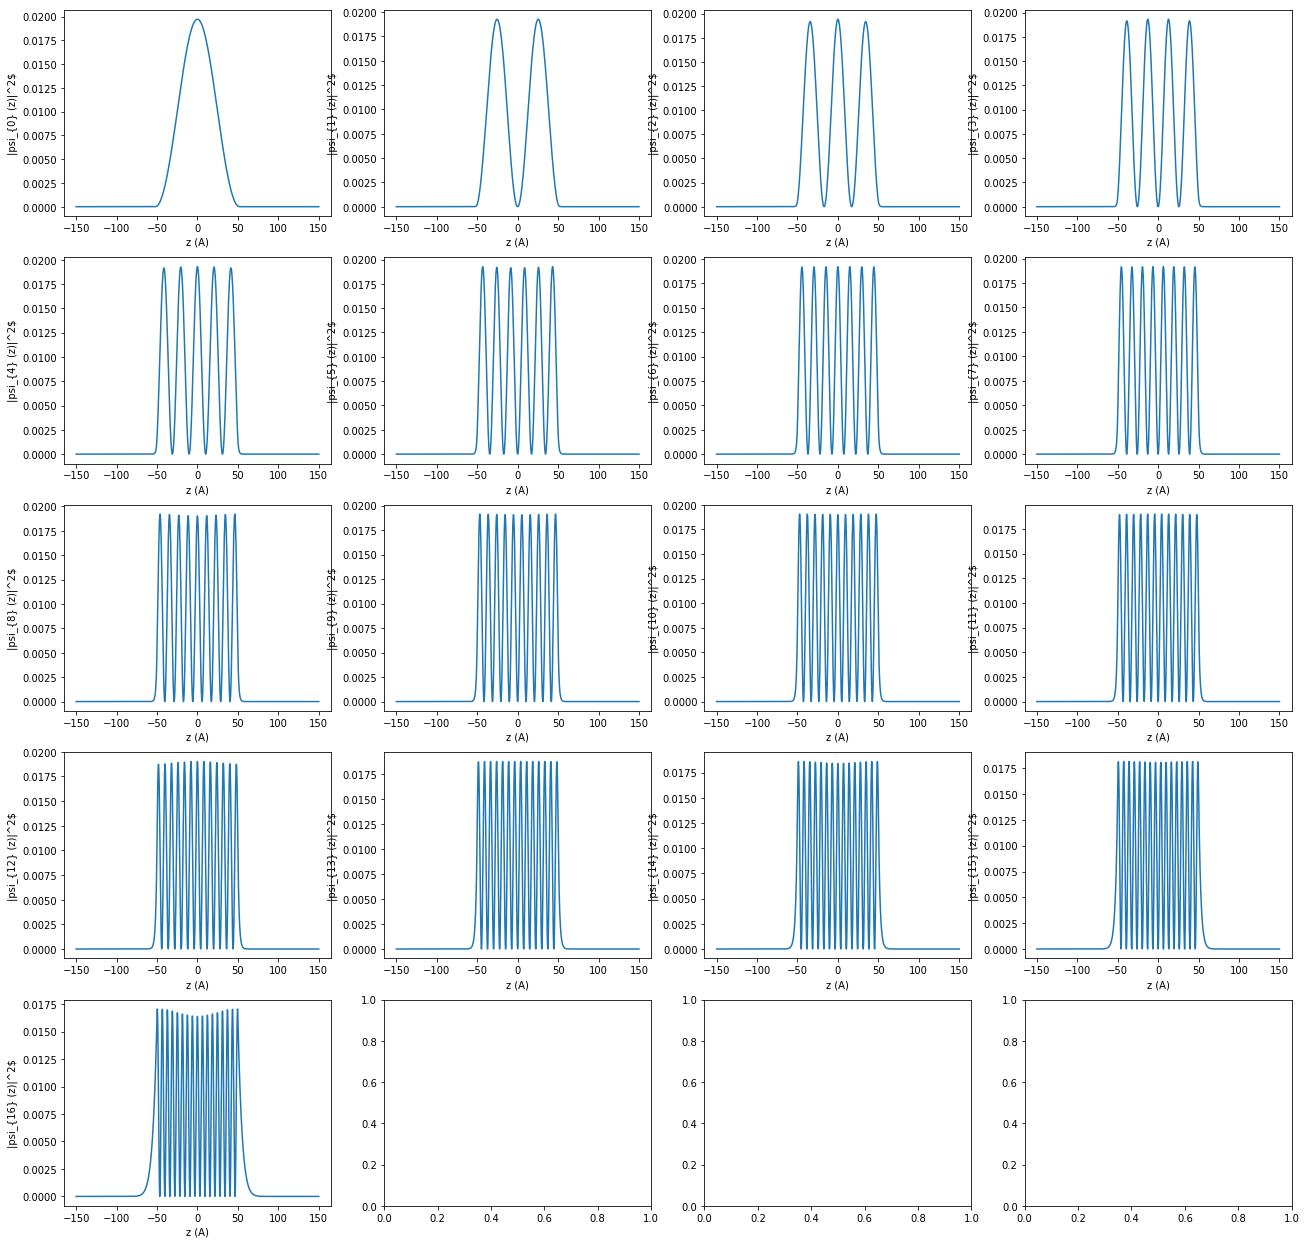

In [31]:
fix, axs = plt.subplots(5,4, figsize=(22,22))
for i in range(5):
    for j in range(4):
        if (4*i+j) >= len(device.eigenstates_ang):
            continue
        axs[i,j].plot(device.z_ang, np.abs(device.eigenstates_ang[4*i+j])**2)
        axs[i,j].set_xlabel(r'z (A)')
        axs[i,j].set_ylabel(r'|psi_{%d} (z)|^2$' % (4*i+j))
plt.show()

Vamos colocar os dados em um DataFrame para depois exportá-los para um **.csv**.

In [35]:
export_values = {
    'z_ang': device.z_ang, # o eixo z em Angstrom
    'v_ev': device.v_ev, # o potencial em eV
}

for i, state in enumerate(device.eigenstates_ang):
    export_values['psi_%02d' % i] = state # psi
    export_values['psi_squared_%d' % i] = np.abs(state)**2 # |psi|^2
results = pd.DataFrame(export_values)
results.to_csv('results/quantum_well_states.csv')
results.head()

,psi_00,psi_01,psi_02,psi_03,psi_04,psi_05,psi_06,psi_07,psi_08,psi_09,...,psi_squared_2,psi_squared_3,psi_squared_4,psi_squared_5,psi_squared_6,psi_squared_7,psi_squared_8,psi_squared_9,v_ev,z_ang
0,(-1.35347557587e-15-6.85707778368e-15j),(-3.28792207707e-12-3.54684801245e-16j),(4.02247173725e-15+5.23399468242e-15j),(-6.66078960954e-12-6.42890536207e-16j),(5.00467691507e-15-4.95982103719e-15j),(-1.00722059513e-11+6.2339733837e-16j),(1.12309650236e-14+4.02880132734e-15j),(-1.34262432764e-11-4.58493114731e-16j),(1.51042615009e-14+3.90508259361e-15j),(-1.67875058833e-11-1.8377499676e-16j),...,4.357498e-29,4.436612e-23,4.964662e-29,1.014493e-22,1.423658e-28,1.802640e-22,2.433884e-28,2.818204e-22,1.0,-150.000000
1,(-7.18676467751e-15-6.70591415816e-15j),(3.30038469789e-12-4.47809072652e-16j),(-1.36115809283e-14+5.13622541289e-15j),(6.65278866754e-12-5.40967276085e-16j),(-2.44609624812e-14-4.7363443262e-15j),(1.00771167986e-11+4.58812299364e-16j),(-3.02892580491e-14+3.98053370194e-15j),(1.34272213149e-11-5.30215167136e-16j),(-3.82851013228e-14+3.97986634054e-15j),(1.67891616534e-11+4.4767982709e-17j),...,2.116559e-28,4.425960e-23,6.207716e-28,1.015483e-22,9.332838e-28,1.802903e-22,1.481588e-27,2.818759e-22,1.0,-149.853444
2,(4.40356138065e-15-6.56996448589e-15j),(-3.28797476188e-12-5.45672392316e-16j),(2.15993329093e-14+5.05337725059e-15j),(-6.6605393128e-12-4.9116768386e-16j),(3.46991018756e-14-4.52291915077e-15j),(-1.00722887722e-11+2.85531770199e-16j),(5.27988572489e-14+3.93477361179e-15j),(-1.34265610495e-11-5.92743203772e-16j),(6.90276144685e-14+4.04895333711e-15j),(-1.67883671467e-11+2.5259779188e-16j),...,4.920678e-28,4.436278e-23,1.224484e-27,1.014510e-22,2.803202e-27,1.802725e-22,4.781206e-27,2.818493e-22,1.0,-149.706888
3,(-1.30486483336e-14-6.47098828845e-15j),(3.30062715974e-12-6.39078679341e-16j),(-3.12456335795e-14+4.99367858026e-15j),(6.65351520539e-12-3.78343750775e-16j),(-5.38980036917e-14-4.32625242602e-15j),(1.00777984269e-11+1.35153364137e-16j),(-7.17522775715e-14+3.91589647204e-15j),(1.3427906619e-11-6.76484316734e-16j),(-9.15600378348e-14+4.13994825966e-15j),(1.67895758925e-11+4.61427993169e-16j),...,1.001226e-27,4.426926e-23,2.923711e-27,1.015620e-22,5.163724e-27,1.803087e-22,8.400380e-27,2.818899e-22,1.0,-149.560332
4,(1.00938777102e-14-6.3897691556e-15j),(-3.28805667467e-12-6.96237569369e-16j),(3.92429175685e-14+4.94009820244e-15j),(-6.66057029261e-12-2.97658464286e-16j),(6.44221249299e-14-4.12398221804e-15j),(-1.00727457738e-11-2.60174614041e-17j),(9.43572154709e-14+3.90477626811e-15j),(-1.34273965255e-11-7.48620067706e-16j),(1.22893754219e-13+4.22887262413e-15j),(-1.67898453001e-11+6.63911465875e-16j),...,1.564411e-27,4.436320e-23,4.167217e-27,1.014602e-22,8.918531e-27,1.802950e-22,1.512076e-26,2.818989e-22,1.0,-149.413776


Nós temos também informações sobre tempo de processamento e número de iterações para cada nível de energia:

In [61]:
perf_metrics = pd.DataFrame({
    'time (s)': device.timers,
    'iterations': device.counters,
    'numeric precision (%)': 100*device.eigenvalues_precisions,
    'analytic (eV)': device.analytical_eigenvalues,
    'numeric (eV)': device.eigenvalues,
    'actual precision (%)': 100.0*(device.eigenvalues/device.analytical_eigenvalues-1.0)
})
perf_metrics.to_csv('results/quantum_well_perf_metrics.csv')
perf_metrics

,actual precision (%),analytic (eV),iterations,numeric (eV),numeric precision (%),time (s)
0,0.200970,0.003483,104000,0.003490,0.009897,44.200331
1,0.158405,0.013930,76000,0.013952,0.009482,57.909837
2,0.122632,0.031335,48000,0.031373,0.008770,52.963557
3,0.110834,0.055689,41000,0.055751,0.009870,57.379051
4,0.099745,0.086978,31000,0.087064,0.009191,53.928562
5,0.086344,0.125181,29000,0.125290,0.007457,61.318514
6,0.087840,0.170275,23000,0.170425,0.009140,56.718994
7,0.083290,0.222225,22000,0.222410,0.007595,60.431666
8,0.075690,0.280986,19000,0.281199,0.006839,58.558660
9,0.074668,0.346501,18000,0.346759,0.006870,63.228557


## Augumas relações interessantes

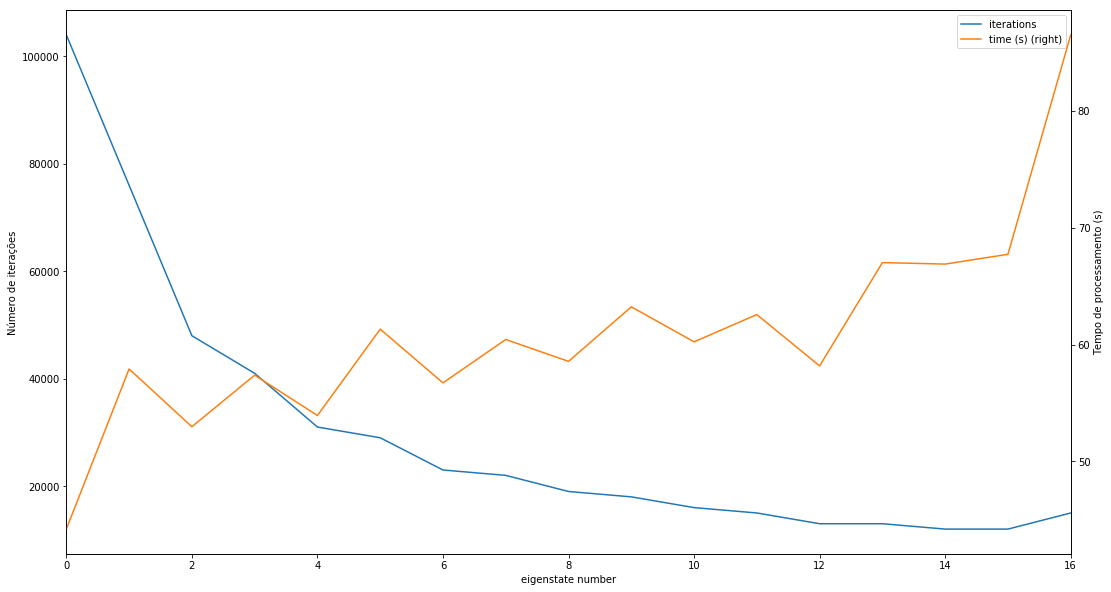

In [65]:
metrics = perf_metrics.copy()
metrics.reset_index(inplace=True)
ax = metrics[['iterations', 'time (s)']].plot(secondary_y='time (s)', figsize=(18,10))
ax.set_xlabel('eigenstate number')
ax.set_ylabel('Número de iterações')
ax.right_ax.set_ylabel('Tempo de processamento (s)')
plt.show()

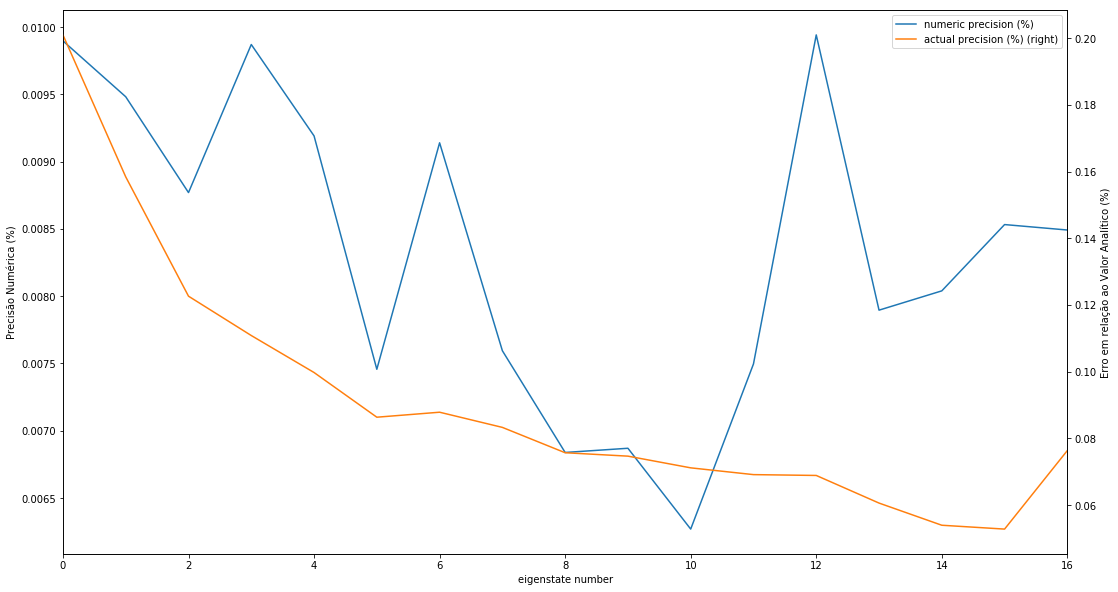

In [67]:
ax = metrics[['numeric precision (%)', 'actual precision (%)']].plot(secondary_y='actual precision (%)', figsize=(18,10))
ax.set_xlabel('eigenstate number')
ax.set_ylabel('Precisão Numérica (%)')
ax.right_ax.set_ylabel('Erro em relação ao Valor Analítico (%)')
plt.show()

## Verificando os resultados analíticos

Aqui vamos variar o dispositivo em largura e verificar os autovalores obtidos analiticamente.

In [8]:
eigenvalues = []
eigenvalues_per_length = []
for Vb in [1.0]:
    for L in np.linspace(10, 300, 1000):
        d = QuantumWell(well_length=L, well_height=Vb)
        evs = d.analytical_solution()
        for ev in evs:
            eigenvalues.append((L,ev))
        eigenvalues_per_length.append((L, len(evs)))

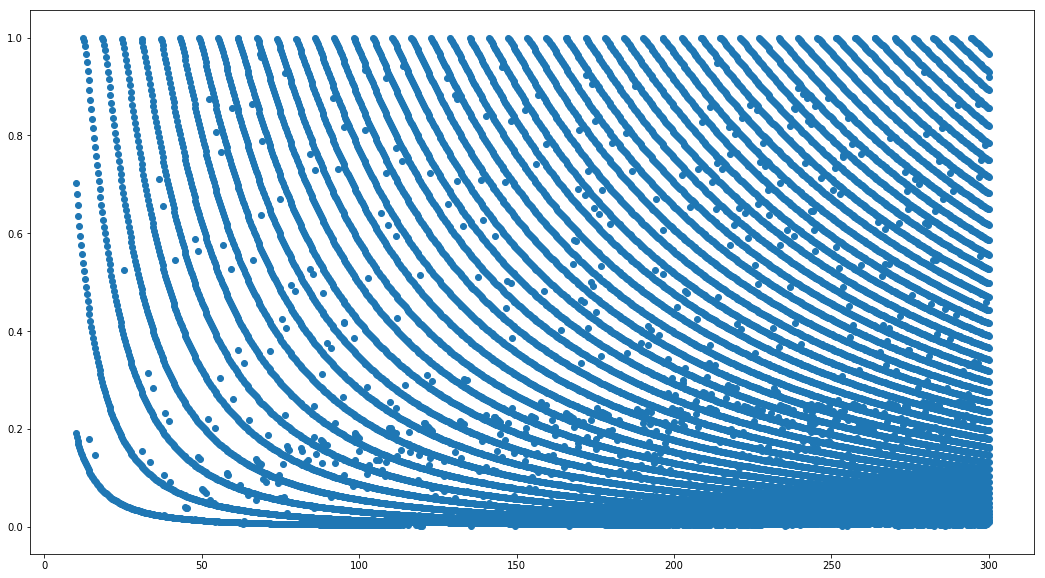

In [9]:
fix, ax = plt.subplots(1,1, figsize=(18,10))
x,y=tuple(zip(*eigenvalues))
ax.scatter(x,y)
plt.show()

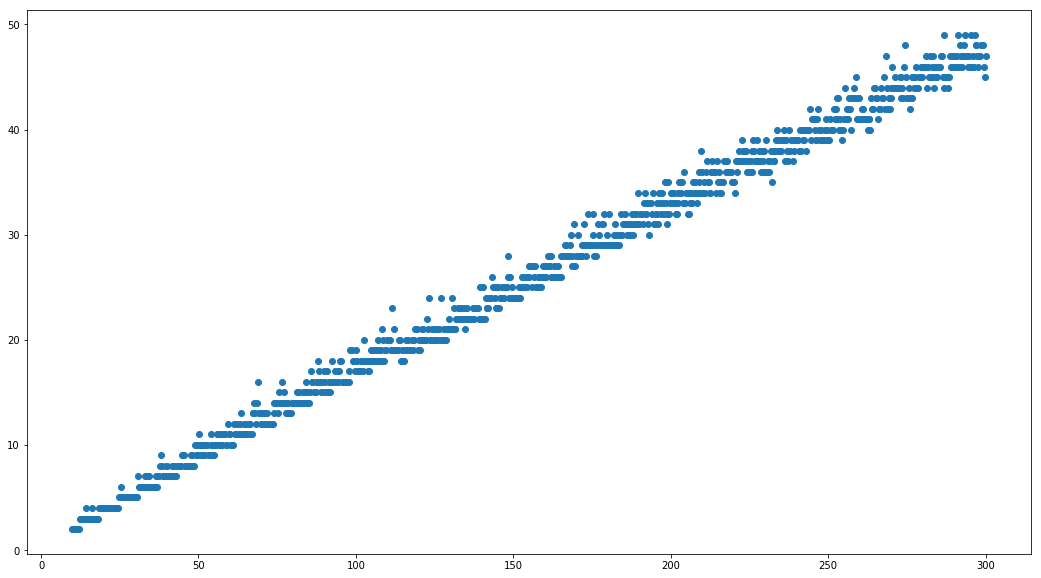

In [10]:
fix, ax = plt.subplots(1,1, figsize=(18,10))
x,y=tuple(zip(*eigenvalues_per_length))
ax.scatter(x,y)
plt.show()

vamos exportar os valores

In [12]:
L,e=tuple(zip(*eigenvalues))
l_e = pd.DataFrame({'L':L, 'e':e})
l_e.to_csv('results/quantum_well_eigenvalues_by_well_length.csv')
l_e

,L,e
0,10.000000,0.190761
1,10.000000,0.702770
2,10.290290,0.183260
3,10.290290,0.679403
4,10.580581,0.176185
5,10.580581,0.656868
6,10.870871,0.169504
7,10.870871,0.635174
8,11.161161,0.163188
9,11.161161,0.614317


In [13]:
L,n=tuple(zip(*eigenvalues_per_length))
l_n = pd.DataFrame({'L':L, 'n':n})
l_n.to_csv('results/quantum_well_number_of_eigenvalues_by_well_length.csv')
l_n

,L,n
0,10.000000,2
1,10.290290,2
2,10.580581,2
3,10.870871,2
4,11.161161,2
5,11.451451,2
6,11.741742,2
7,12.032032,2
8,12.322322,3
9,12.612613,3


In [2]:
eigenvalues = []
eigenvalues_per_length = []
for Vb in [1.0]:
    for L in np.linspace(10, 300, 1000):
        d = QuantumWell(well_length=L, well_height=Vb)
        evs = d.analytical_solution()
        for ev in evs:
            eigenvalues.append((L,ev))
        eigenvalues_per_length.append((L, len(evs)))
        print('Estamos em L = %.2f' % L)

Estamos em L = 10.00
Estamos em L = 10.29
Estamos em L = 10.58
Estamos em L = 10.87
Estamos em L = 11.16
Estamos em L = 11.45
Estamos em L = 11.74
Estamos em L = 12.03
Estamos em L = 12.32
Estamos em L = 12.61
Estamos em L = 12.90
Estamos em L = 13.19
Estamos em L = 13.48
Estamos em L = 13.77
Estamos em L = 14.06
Estamos em L = 14.35
Estamos em L = 14.64
Estamos em L = 14.93
Estamos em L = 15.23
Estamos em L = 15.52
Estamos em L = 15.81
Estamos em L = 16.10
Estamos em L = 16.39
Estamos em L = 16.68
Estamos em L = 16.97
Estamos em L = 17.26
Estamos em L = 17.55
Estamos em L = 17.84
Estamos em L = 18.13
Estamos em L = 18.42
Estamos em L = 18.71
Estamos em L = 19.00
Estamos em L = 19.29
Estamos em L = 19.58
Estamos em L = 19.87
Estamos em L = 20.16
Estamos em L = 20.45
Estamos em L = 20.74
Estamos em L = 21.03
Estamos em L = 21.32
Estamos em L = 21.61
Estamos em L = 21.90
Estamos em L = 22.19
Estamos em L = 22.48
Estamos em L = 22.77
Estamos em L = 23.06
Estamos em L = 23.35
Estamos em L 

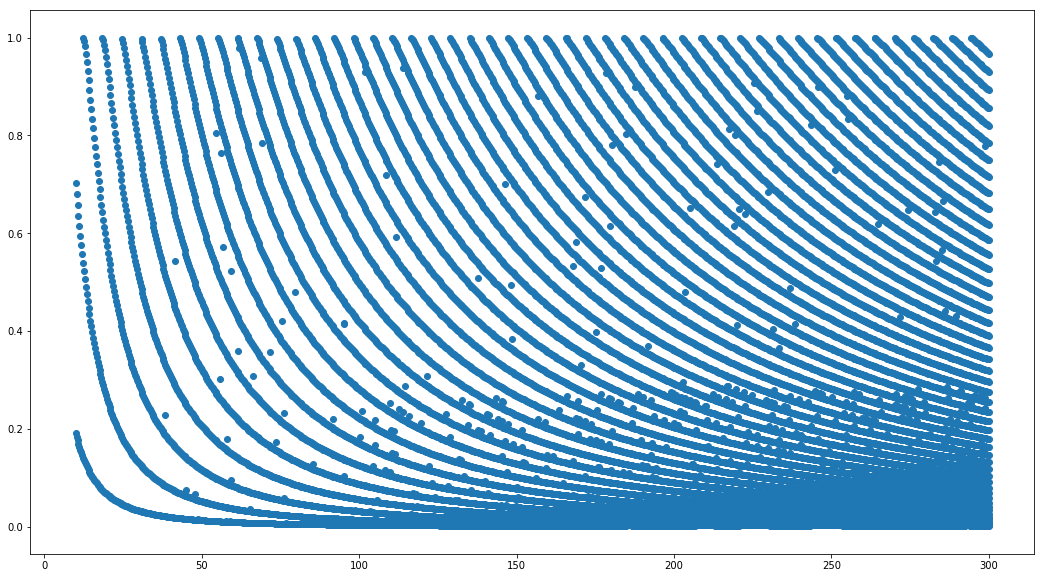

In [3]:
fix, ax = plt.subplots(1,1, figsize=(18,10))
x,y=tuple(zip(*eigenvalues))
ax.scatter(x,y)
plt.show()

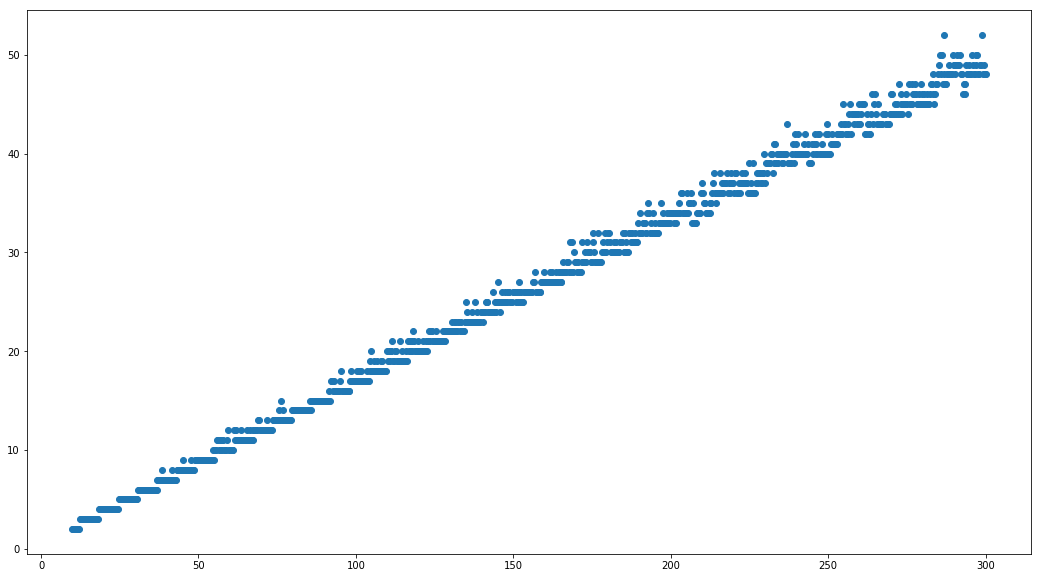

In [4]:
fix, ax = plt.subplots(1,1, figsize=(18,10))
x,y=tuple(zip(*eigenvalues_per_length))
ax.scatter(x,y)
plt.show()

In [8]:
L,e=tuple(zip(*eigenvalues))
l_e = pd.DataFrame({'L':L, 'e':e})
l_e.to_csv('results/quantum_well_eigenvalues_by_well_length.csv')
l_e

,L,e
0,10.000000,0.190761
1,10.000000,0.702770
2,10.290290,0.183260
3,10.290290,0.679403
4,10.580581,0.176185
5,10.580581,0.656868
6,10.870871,0.169504
7,10.870871,0.635174
8,11.161161,0.163188
9,11.161161,0.614317


In [7]:
L,n=tuple(zip(*eigenvalues_per_length))
l_n = pd.DataFrame({'L':L, 'n':n})
l_n.to_csv('results/quantum_well_number_of_eigenvalues_by_well_length.csv')
l_n

,L,n
0,10.000000,2
1,10.290290,2
2,10.580581,2
3,10.870871,2
4,11.161161,2
5,11.451451,2
6,11.741742,2
7,12.032032,2
8,12.322322,3
9,12.612613,3
